# 直方图处理

OpenCV-Python Tutorials
* [Histograms in OpenCV](https://docs.opencv.org/4.7.0/de/db2/tutorial_py_table_of_contents_histograms.html)

OpenCV Tutorials / Image Processing (imgproc module)
* [Histogram Equalization](https://docs.opencv.org/4.7.0/d4/d1b/tutorial_histogram_equalization.html)
* [Histogram Calculation](https://docs.opencv.org/4.7.0/d8/dbc/tutorial_histogram_calculation.html)
* [Histogram Comparison](https://docs.opencv.org/4.7.0/d8/dc8/tutorial_histogram_comparison.html)
* [Back Projection](https://docs.opencv.org/4.7.0/da/d7f/tutorial_back_projection.html)
* [Template Matching](https://docs.opencv.org/4.7.0/de/da9/tutorial_template_matching.html)

直方图是图像处理过程中的一种非常重要的分析工具。直方图从图像内部灰度级的角度对图像进行表述，包含十分丰富而重要的信息。从直方图的角度对图像进行处理，可以达到增强图像显示效果的目的。

## 直方图的含义

从统计的角度讲，直方图是图像内灰度值的统计特性与图像灰度值之间的函数，直方图统计图像内各个灰度级出现的次数。从直方图的图形上观察，横坐标是图像中各像素点的灰度级，纵坐标是具有该灰度级（像素值）的像素个数。

在绘制直方图时，将灰度级作为x轴处理，该灰度级出现的次数作为y轴处理。

有时为了便于表示，也会采用归一化直方图。在归一化直方图中，x轴仍然表示灰度级；y轴不再表示灰度级出现的次数，而是灰度级出现的频率。

In [1]:
import time
t0 = time.time()

# 初始化 opencv
import cv2
print(f"load opencv lib used {(time.time() - t0):.2f}s")

# https://github.com/opencv/opencv/tree/4.x/samples/data
# cv2.samples.addSamplesDataSearchPath("./images")
picture_file = cv2.samples.findFile("images/starry_night.jpg")
print(f"locate starry_night.jpg: {picture_file}")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

load opencv lib used 0.22s
locate starry_night.jpg: images/starry_night.jpg


## 绘制直方图

Python 的模块 `matplotlib.pyplot`中的 `hist()` 函数能够方便地绘制直方图，我们通常采用该函数直接绘制直方图。

除此以外，OpenCV 中的 `cv2.calcHist()` 函数能够计算统计直方图，还可以在此基础上绘制图像的直方图。

### 使用 matploblib

<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html>

`matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

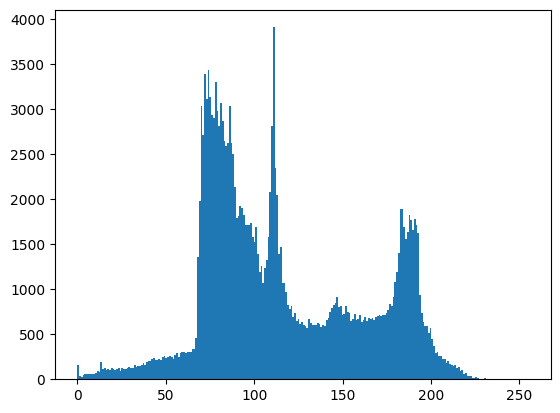

In [24]:
img = cv2.imread("images/home.jpg", cv2.IMREAD_GRAYSCALE)
plt.hist(img.ravel(),256); plt.show()

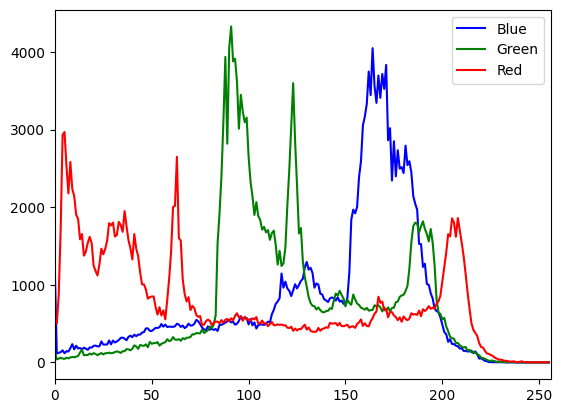

In [11]:
img = cv2.imread("images/home.jpg")

# Include plot_util.py from local path
from plot_util import draw_rgb_lines
draw_rgb_lines(img)

(794, 600, 3)


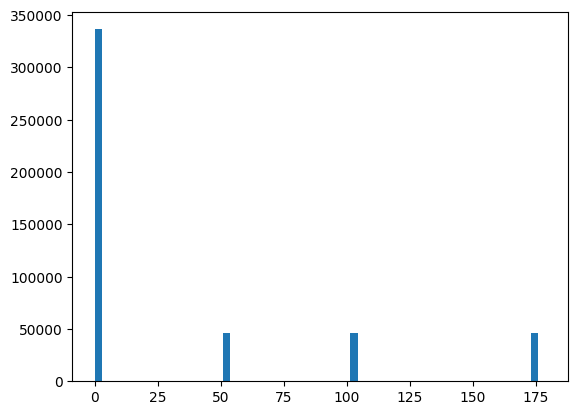

In [30]:
# 分析一下 [色彩空间类型转换](./02_colorspace.ipynb) 中 `opencv-logo.png` 的直方图信息
opencv=cv2.imread("images/opencv-logo.png")
print(opencv.shape)
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)

# draw_rgb_lines(hsv, title=["Hue", "Saturation", "Value"])

hue = hsv[:,:,0]
plt.hist(hue.ravel(),60); plt.show()

### 使用 [cv.calcHist()](https://docs.opencv.org/4.7.0/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)

```
void cv::calcHist (
	const	Mat * 	images,
	int 	nimages,
	const	int * 	channels,
	InputArray 	mask,
	OutputArray 	hist,
	int 	dims,
	const	int * 	histSize,
	const	float ** 	ranges,
	bool 	uniform = true,
	bool 	accumulate = false 
)		

Python: cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]	) -> hist


```

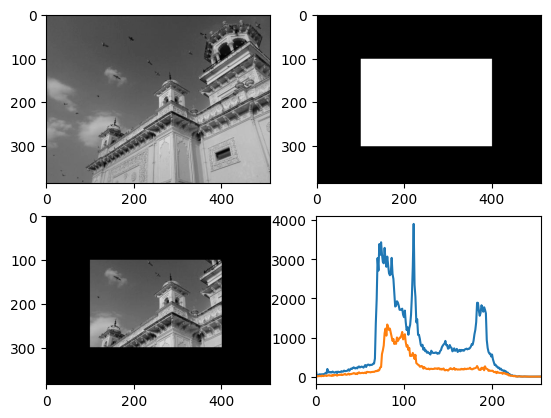

In [18]:
img = cv2.imread("images/home.jpg", cv2.IMREAD_GRAYSCALE)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()